# Loan Prediction

In this analysis we will be doing a loan prediction project using various algorithms to determine which is the best. 

<br>

The goal is to predict which customers have the 'right stuff' to get a loan from a bank. 

<br>

During this process, I will be sure to explain the machine learning algorithms used and provide resources that were used and for an in depth understanding. 


Follow along here:
- [Github](https://github.com/iamAngelSH)
- [Twitter](https://twitter.com/iamAngelSH)

### Import Libraries

<br>

Here will be all the libraries used for this project. 
- Depening on the time you see this, libraries will be added. 
- They will all be kept and organized accordingly here.

In [1]:
'''
Data Visualization and Data Analysis
- Updated on March 1st, 2022
'''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Our first order of business is to get the data and assign it to our resepected variables.**

<br>

For this I will be creating a function that will get the data and return the files we need.
- Specifically for this project we will be using two datasets
    - Training data
    - Testing data

In [33]:
'''
Created March 1, 2022
'''

def get_files(url):
    df = pd.read_csv(url)
    
    
    # RETURN OUR DATA FRAMES 
    return df


data1 = 'Data/train.csv'
data2 = 'Data/test.csv'

train_df = get_files(data1)
test_df = get_files(data2)

### Preliminary Data Analysis



<br>

We will be conducting preliminary data analysis which includes:
- Previewing the data
- Looking at the structure of our data
- Looking at our columns
- Looking at our missing values
    - Filling in missing values appropriately



In [34]:
'''
Created March 1, 2022


Lets first look at first 5 rows of our data.

- For this, I only be using one of our data frames (train_df)
'''

def show_dataframe(dataframe):
    return dataframe.head()

show_dataframe(train_df)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Given that we are working with two different data sets, it is a good idea to see how much data we are working with on each. this will give us a good understanding of how much is provided for us.

In [37]:
'''
Created March 2, 2022

Return number of columns and rows in our data frames
'''

def df_shape(df):
    r1 = df.shape[0]
    c1 = df.shape[1]

        
        
    print(f'Rows in data set: {r1} \nColumns in data set: {c1}')
    
    
df_shape(train_df)
print()
df_shape(test_df)


Rows in data set: 614 
Columns in data set: 13

Rows in data set: 367 
Columns in data set: 12


**Looking at our columns**

Since we are working with testing and training data, lets take a look at our column names on both data frames and see if they match, and see what columns we are working with.

In [39]:
'''
Created March 2, 2022

Looking at the columns for our testing and training data
'''

def look_at_columns(df):
    return list(df.columns)

col_train_df = look_at_columns(train_df)
col_test_df = look_at_columns(test_df)

In [40]:
col_train_df

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

In [41]:
col_test_df

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area']

As we can see, our two datasets are similar, except that our testing data data frame has an extra column called 'Loan Status' which will be used for predictive modeling when we get to our Machine Learning modeling.

<br>



Our next order of business would be to take a look at any missing values present in our data, this is good because if there is too many NA values in a column (or dataset in general), we have to decide what we want to do with it.

We can take a look at our visual below to see missing values.

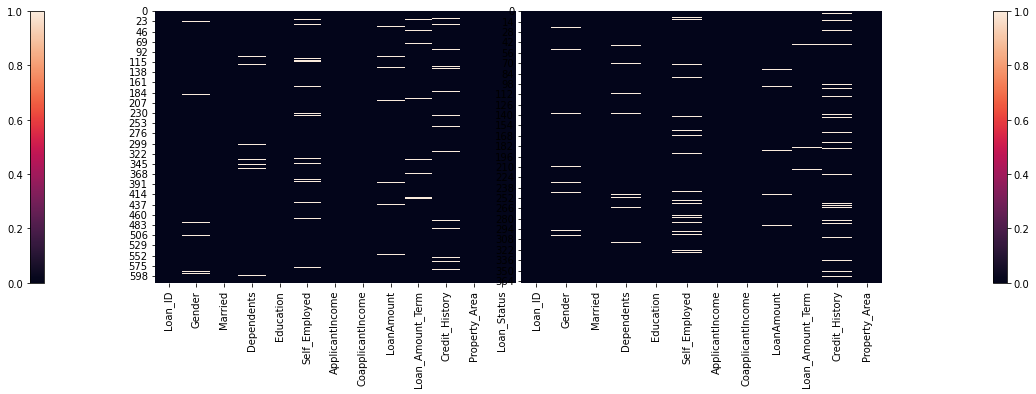

In [8]:
'''
Created March 2, 2022

Looking at our data frames for missing values using a heat map
'''
def show_missing_values(df1, df2):

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20,5))
    fig.subplots_adjust(wspace=0.01)
    sns.heatmap(df1.isnull(), cmap="rocket", ax=ax1, cbar=False)
    fig.colorbar(ax1.collections[0], ax=ax1, location="left", use_gridspec=False, pad=0.2)

    sns.heatmap(df2.isnull(), cmap="rocket", ax=ax2, cbar=False)
    fig.colorbar(ax2.collections[0], ax=ax2, location="right", use_gridspec=False, pad=0.2)

    plt.show()

show_missing_values(train_df, test_df)

As we can see from our resulting heatmap of missing values, both dataframes do contain missing values in more than one column. 
Being able to visually see these things helps us to decided what we should do next. 

Two things we are going to do:
1. Check how many NA values are in the dataframes
2. Fill in the NA values 
    - 2 types of fills:
        - 'ffill': Forward filling
            - Filling NA with values in the previous row
        - 'bfill': Backward filling
            - Filling NA with values after current row
    - For this case, we will use forward filling
  


<br>

This now leeds us to our next phase, Data Cleaning

<!-- ---- Finished in March 3, 2022 -->

### Data Cleaning

In [9]:
''' Created March 3, 2022

1. Create helper function to find number of missing values
2. Create helper function to fill in missing value
'''

def missing_values(df):
    return df.isna().sum() 
    
missVals_train_df = missing_values(train_df)
missVals_test_df = missing_values(test_df)

In [10]:
missVals_train_df # --- Missing Values for our training dataset

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
missVals_test_df # --- Missing Values for our testing data

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

**Handling missing Values**


Now that we know which columns contains are missing values, we can fill them in accordingly. The reason I don't see why we need to drop these rows is because there is not a big enough number to drop these rows. If there were more than 100 NA values per column, we can drop them.


We will handle each column individually.



In [12]:
train_df.astype('object').describe().transpose()

,count,unique,top,freq
Loan_ID,614,614,LP001002,1
Gender,601,2,Male,489
Married,611,2,Yes,398
Dependents,599,4,0,345
Education,614,2,Graduate,480
Self_Employed,582,2,No,500
ApplicantIncome,614,505,2500,9
CoapplicantIncome,614.0,287.0,0.0,273.0
LoanAmount,592.0,203.0,120.0,20.0
Loan_Amount_Term,600.0,10.0,360.0,512.0


<!-- ---- Created March 4, 2022 -->
As we can see from our above figure, each column has a different representation of values, we will fill the columns with NA values with their respected top value.

**NOTE: COLUMNS WITH NA VALUES IS WHERE THE COUNT IS LESS THAN 614**


- Gender:
    - Fill in the values with MALE
- Married:
    - Fill in the values with YES
- Dependents:
    - Fill in with 0 
- Self Employed:
    - Fill in with NO 
- Loan Amount:
    - Fill in with median value; don't want to skew the results with the top amount
- Loan Amount Term:
    - Fill in with median value; don't want to skew the results with the top amount
- Credit History
    - Use forward filling
    
<br>

We will begin working with the train dataframe first.
- Will not create a new variable to hold this new dataframe of values
- Will be using inplace to replace values in real time

In [13]:
train_df['Gender'].fillna(                  # REPLACE NA WITH MALE
    'Male', 
    inplace = True)

train_df['Gender'].isna().values.any()      # SHOULD RETURN FALSE

False

In [14]:
train_df['Married'].fillna(                  # REPLACE NA WITH YES
    'Yes', 
    inplace = True) 

train_df['Married'].isna().values.any()      # SHOULD RETURN FALSE


False

In [15]:
train_df['Dependents'].fillna(              # REPLACE NA WITH 0
    0,
    inplace = True)

train_df['Dependents'].isna().values.any()  # SHOULD RETURN FALSE


False

In [16]:
train_df['Self_Employed'].fillna(             # REPLACE NA WITH NO
    'No', 
    inplace = True)

train_df['Self_Employed'].isna().values.any() # SHOULD RETURN FALSE


False

In [17]:
train_df['LoanAmount'].fillna(               # REPLACE NA WITH MEDIAN
    train_df['LoanAmount'].median(), 
    inplace = True)

train_df['LoanAmount'].isna().values.any()   # SHOULD RETURN FALSE


False

In [18]:
train_df['Loan_Amount_Term'].fillna(              # REPLACE NA WITH MEDIAN
    train_df['Loan_Amount_Term'].median(), 
    inplace = True) 

train_df['Loan_Amount_Term'].isna().values.any()  # SHOULD RETURN FALSE


False

In [19]:
train_df['Credit_History'].fillna(               # REPLACE NA WITH FFILL
    method = 'ffill', 
    inplace = True)

train_df['Credit_History'].isna().values.any()   # SHOULD RETURN FALSE


False

Lets check our dataframe to make sure there are no more missing values.

In [20]:
train_df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

We have now finished replacing the missing values in our train data frame.


Since we are working with 2 datasets (train & test), we want to make sure our test data frame also doesn't have any NA values. If it does, same process as above.


Lets see what columns have NA values, and fill them accordingly like we did for our train dataframe.


**Note: Our total count for values in this set is 367**

In [21]:
test_df.astype('object').describe().transpose()

,count,unique,top,freq
Loan_ID,367,367,LP001015,1
Gender,356,2,Male,286
Married,367,2,Yes,233
Dependents,357,4,0,200
Education,367,2,Graduate,283
Self_Employed,344,2,No,307
ApplicantIncome,367,314,5000,6
CoapplicantIncome,367,194,0,156
LoanAmount,362.0,144.0,150.0,12.0
Loan_Amount_Term,361.0,12.0,360.0,311.0


<!-- Created March 5, 2022 -->

This is how we will fill our test dataframe NA values:
- Gender with MALE
- Dependents with 0
- Self Employed with NO
- Loan Amount with Median
- Loan Amount Term with Median
- Credit History with 1


In [22]:
test_df['Gender'].fillna(
    'Male',
    inplace = True)

test_df['Gender'].isna().values.any()

False

In [23]:
test_df['Dependents'].fillna(
    '0',
    inplace = True)

test_df['Dependents'].isna().values.any()

False

In [24]:
test_df['Self_Employed'].fillna(
    'No',
    inplace = True)

test_df['Self_Employed'].isna().values.any()

False

In [25]:
test_df['LoanAmount'].fillna(
    test_df['LoanAmount'].median(),
    inplace = True)

test_df['LoanAmount'].isna().values.any()

False

In [26]:
test_df['Loan_Amount_Term'].fillna(
    test_df['Loan_Amount_Term'].median(),
    inplace = True)

test_df['Loan_Amount_Term'].isna().values.any()

False

In [27]:
test_df['Credit_History'].fillna(
    1,
    inplace = True)

test_df['Credit_History'].isna().values.any()

False

Now lets check our test dataframe to make sure that the columns do not contain any NA values.

In [28]:
test_df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

Awesome, lets move on to the next section in our Loan Prediction project.

### Exploratory Data Analysis 
- **using Data Visualiation**

Now that we finished preliminary work:
- Viewing our data
- Filling in any NA values


We can begin doing Exploratory Data Analysis to see view in more detail what are data is trying to tell us. 


Doing EDA, allows us to have a better comprehension of how our data stacks up. How each column is interacting with each other, etc..

Again, we will be using our training dataset as this is what we are working with.

In [42]:
''' Created March 6, 2022

Visualizations:
- Correlation plot
- Subplots on loan status


-- DON'T WANT TO SPEND TO MUCH TIME ON VISUALS/EDA
'''

show_dataframe(train_df) # VIEW OUR DATA FOR REMEMBRANCE

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


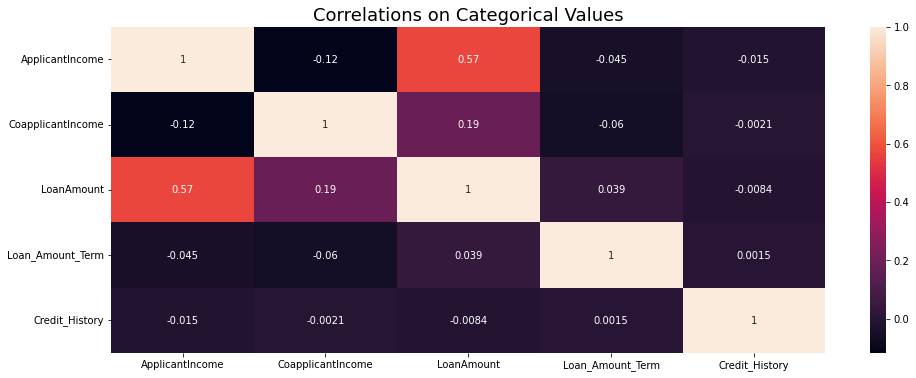

In [49]:
def show_correlations(df, title):
    
    plt.figure(figsize = (16, 6)) # SET FIG SIZE
    
    heatmap = sns.heatmap(        # INIT HEATMAP OBJECT
        df.corr(),                # TYPE OF HEATMAP (CORRELATION)
        annot = True,             # TRUE TO WRITE DATA IN CELL
        cmap = 'rocket'             # COLORMAP NAME
    )
    
    heatmap.set_title(            # INIT TITLE OBJECT
        title,                    # GIVE TITLE AS INPUT (STRING FORMAT)
        fontdict={'fontsize':18}  # GIVE COMMANDS FOR FONT DICT
    )

show_correlations(train_df, 'Correlations on Categorical Values')